In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the model results as pandas df
bert_df = pd.read_csv("/data/2025-03-30_bert_fixed.csv")
mbert_df = pd.read_csv("/data/2025-03-30_mbert_fixed.csv")
bibert_df = pd.read_csv("~/data/2025-03-30_bibert_fixed.csv")

# Display first 3 rows of the data
display(bert_df.head(3))
display(mbert_df.head(3))
display(bibert_df.sample(3))

,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon,sentence_masked,good_fillers,bad_fillers,bert_good_prob,bert_bad_prob,bert_prediction
0,Who should Derek hug after shocking Richard?,Who should Derek hug Richard after shocking?,syntax,island_effects,adjunct_island,True,False,False,True,0,ISLAND,Who should Derek hug [MASK]?,"['after', 'shocking', 'Richard']","['Richard', 'after', 'shocking']",0.000078,0.000024,1
1,What had Theresa walked through while talking ...,What had Theresa walked through that high scho...,syntax,island_effects,adjunct_island,True,False,False,True,1,ISLAND,What had Theresa walked through [MASK]?,"['while', 'talking', 'about', 'that', 'high', ...","['that', 'high', 'school', 'while', 'talking',...",0.009957,0.005844,1
2,Who will Katherine discover without hiring Erin?,Who will Katherine discover Erin without hiring?,syntax,island_effects,adjunct_island,True,False,False,True,2,ISLAND,Who will Katherine discover [MASK]?,"['without', 'hiring', 'Erin']","['Erin', 'without', 'hiring']",0.000013,0.000009,1


,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon,sentence_masked,good_fillers,bad_fillers,bert_good_prob,bert_bad_prob,bert_prediction
0,Who should Derek hug after shocking Richard?,Who should Derek hug Richard after shocking?,syntax,island_effects,adjunct_island,True,False,False,True,0,ISLAND,Who should Derek hug [MASK]?,"['after', 'shock', '##ing', 'Richard']","['Richard', 'after', 'shock', '##ing']",0.001766,0.001394,1
1,What had Theresa walked through while talking ...,What had Theresa walked through that high scho...,syntax,island_effects,adjunct_island,True,False,False,True,1,ISLAND,What had Theresa walked through [MASK]?,"['while', 'talking', 'about', 'that', 'high', ...","['that', 'high', 'school', 'while', 'talking',...",0.012896,0.009715,1
2,Who will Katherine discover without hiring Erin?,Who will Katherine discover Erin without hiring?,syntax,island_effects,adjunct_island,True,False,False,True,2,ISLAND,Who will Katherine discover [MASK]?,"['without', 'hiri', '##ng', 'Erin']","['Erin', 'without', 'hiri', '##ng']",0.000119,0.000289,0


,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon,sentence_masked,good_fillers,bad_fillers,bert_good_prob,bert_bad_prob,bert_prediction
56796,Who haven't many cashiers found out they did d...,Who haven't many cashiers found out who did di...,syntax,island_effects,wh_island,True,True,False,False,130,ISLAND,Who haven't many cashiers found out [MASK] did...,['they'],['who'],0.000303,0.000065,1
21060,That boy was worrying one niece and some glass...,That boy was worrying one hopeful niece and so...,syntax,ellipsis,ellipsis_n_bar_2,True,False,False,False,731,ELLIPSIS,That boy was worrying one [MASK].,"['niece', 'and', 'some', 'glasses', 'aren', ""'...","['hopeful', 'niece', 'and', 'some', 'glasses',...",0.000020,0.000016,1
17405,The sons of Homer do attack Stacey.,The sons of Homer does attack Stacey.,morphology,subject_verb_agreement,distractor_agreement_relational_noun,True,True,False,False,649,S-V AGR,The sons of Homer [MASK] attack Stacey.,['do'],['does'],0.000042,0.000149,0


In [3]:
# Rename the last 6 columns of mbert_df and bibert_df
mbert_df = mbert_df.rename(columns={
    'sentence_masked': 'sentence_masked_mbert',
    'good_fillers': 'good_fillers_mbert',
    'bad_fillers': 'bad_fillers_mbert',
    'bert_good_prob': 'mbert_good_prob',
    'bert_bad_prob': 'mbert_bad_prob',
    'bert_prediction': 'mbert_prediction'
})

bibert_df = bibert_df.rename(columns={
    'sentence_masked': 'sentence_masked_bibert',
    'good_fillers': 'good_fillers_bibert',
    'bad_fillers': 'bad_fillers_bibert',
    'bert_good_prob': 'bibert_good_prob',
    'bert_bad_prob': 'bibert_bad_prob',
    'bert_prediction': 'bibert_prediction'
})

merged_df = bert_df.merge(
    mbert_df[['pair_id', 'paradigm', 'sentence_masked_mbert', 'good_fillers_mbert', 'bad_fillers_mbert', 'mbert_good_prob', 'mbert_bad_prob', 'mbert_prediction']],
    on=['pair_id', 'paradigm']
).merge(
    bibert_df[['pair_id', 'paradigm', 'sentence_masked_bibert', 'good_fillers_bibert', 'bad_fillers_bibert', 'bibert_good_prob', 'bibert_bad_prob', 'bibert_prediction']],
    on=['pair_id', 'paradigm']
)

# Display the merged DataFrame
display(merged_df.sample(10))

,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,...,bad_fillers_mbert,mbert_good_prob,mbert_bad_prob,mbert_prediction,sentence_masked_bibert,good_fillers_bibert,bad_fillers_bibert,bibert_good_prob,bibert_bad_prob,bibert_prediction
28266,A door hasn't shut.,A door hasn't looked like.,syntax,argument_structure,intransitive,True,False,False,False,941,...,"['looked', 'like']",0.001421,0.005647,0,A door hasn't [MASK].,['shut'],"['looked', 'like']",2.701821e-04,2.486574e-04,1
9002,Some men weren't touring those cafes.,Some men weren't touring those cafe.,morphology,determiner_noun_agreement,determiner_noun_agreement_1,True,True,False,True,6,...,"['ca', '##fe']",0.000928,0.000388,1,Some men weren't touring those [MASK].,['cafes'],['cafe'],9.384549e-07,2.200076e-07,1
38914,Adam's girlfriend wasn't attacked by Kenneth's...,Adam's girlfriend wasn't shouted by Kenneth's ...,syntax,argument_structure,passive_1,True,False,False,False,948,...,"['sh', '##out', '##ed']",0.002964,0.001975,1,Adam's girlfriend wasn't [MASK] by Kenneth's b...,['attacked'],['shouted'],3.043144e-05,1.759206e-04,0
28931,The forgotten book wasn't gray.,The forgot book wasn't gray.,morphology,irregular_forms,irregular_past_participle_adjectives,True,False,True,False,606,...,"['for', '##got']",0.006897,0.000826,1,The [MASK] book wasn't gray.,['forgotten'],['forgot'],7.990831e-05,1.533187e-06,1
15465,That picture hasn't looked like these big men.,That picture hasn't looked like this big men.,morphology,determiner_noun_agreement,determiner_noun_agreement_with_adj_irregular_2,True,False,True,True,469,...,['this'],0.047481,0.004001,1,That picture hasn't looked like [MASK] big men.,['these'],['this'],2.449431e-05,4.289071e-06,1
17229,The sisters of a woman were intending to protest.,The sisters of a woman is intending to protest.,morphology,subject_verb_agreement,distractor_agreement_relational_noun,True,True,False,False,366,...,['is'],0.508411,0.004975,1,The sisters of a woman [MASK] intending to pro...,['were'],['is'],2.492364e-06,2.167246e-06,1
51280,Who had every woman's appreciating Beth irrita...,Who had every woman's appreciating irritated B...,syntax,island_effects,sentential_subject_island,True,False,False,True,570,...,"['ir', '##rita', '##ted', 'Beth']",0.000325,0.000098,1,Who had every woman's appreciating [MASK].,"['beth', 'irrit', '##ated']","['irrit', '##ated', 'beth']",2.974406e-05,7.558307e-06,1
46157,It's herself that Donna hadn't listened to.,It's herself that hadn't listened to Donna.,syntax_semantics,binding,principle_A_reconstruction,True,False,False,True,196,...,"['had', '##n', ""'"", 't', 'listen', '##ed', 'to...",0.006657,0.007156,0,It's herself that [MASK].,"['donna', 'hadn', ""'"", 't', 'listened', 'to']","['hadn', ""'"", 't', 'listened', 'to', 'donna']",3.735193e-05,2.865970e-05,1
52427,No teenager criticizes more than seven pedestr...,No teenager criticizes at least seven pedestri...,semantics,quantifiers,superlative_quantifiers_1,True,False,False,False,717,...,"['at', 'least']",0.013735,0.123194,0,No teenager criticizes [MASK] seven pedestrians.,"['more', 'than']","['at', 'least']",4.280704e-05,2.264223e-06,1
48874,Many socks can not ever shrink.,Many socks can probably ever shrink.,semantics,npi_licensing,sentential_negation_npi_licensor_present,True,False,True,False,164,...,['probably'],0.011079,0.000622,1,Many socks can [MASK] ever shrink.,['not'],['probably'],8.331006e-06,3.058308e-05,0


In [4]:
# Overall accuracy of the models
# Display overall accuracy for all three models
print(f"BERT Accuracy: {merged_df['bert_prediction'].mean():.4f}")
print(f"mBERT Accuracy: {merged_df['mbert_prediction'].mean():.4f}")
print(f"BiBERT Accuracy: {merged_df['bibert_prediction'].mean():.4f}")

BERT Accuracy: 0.7551
mBERT Accuracy: 0.6582
BiBERT Accuracy: 0.5839


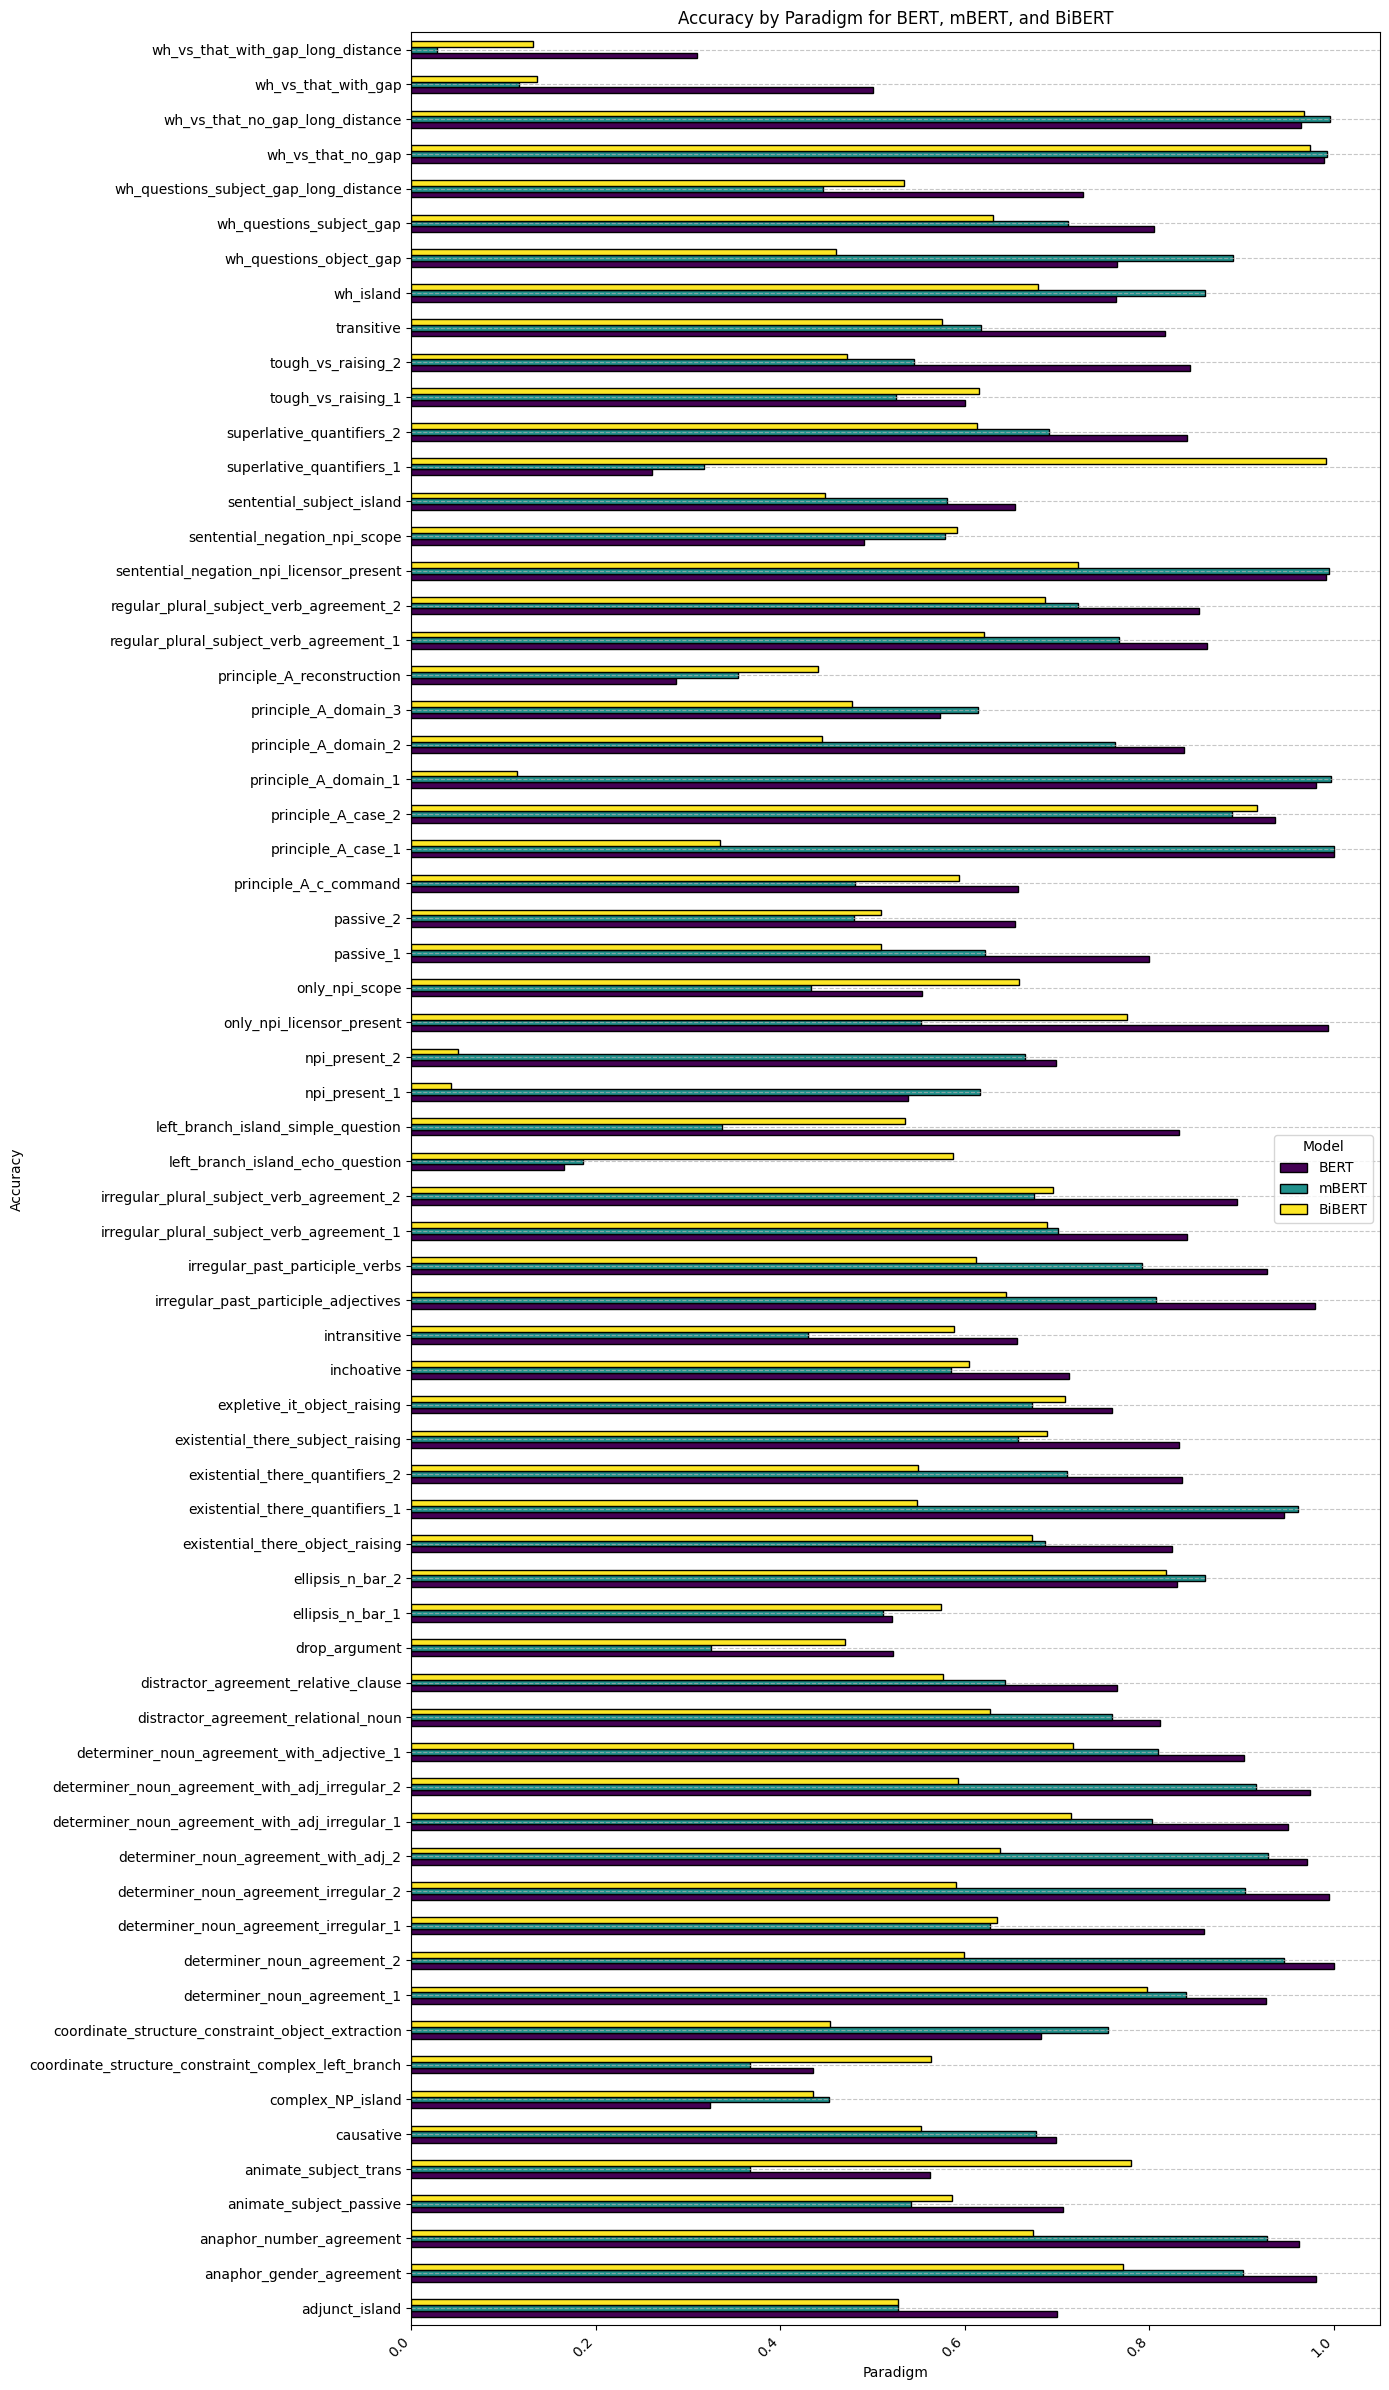

In [5]:
# Calculate accuracy per paradigm for all three models
bert_accuracy_by_paradigm = bert_df.groupby("paradigm")["bert_prediction"].mean()
mbert_accuracy_by_paradigm = mbert_df.groupby("paradigm")["mbert_prediction"].mean()
bibert_accuracy_by_paradigm = bibert_df.groupby("paradigm")["bibert_prediction"].mean()

# Combine the accuracies into a single DataFrame for plotting
accuracy_by_paradigm_df = pd.DataFrame({
    'BERT': bert_accuracy_by_paradigm,
    'mBERT': mbert_accuracy_by_paradigm,
    'BiBERT': bibert_accuracy_by_paradigm
})

# Plot the accuracies
accuracy_by_paradigm_df.sort_index().plot(kind='barh', figsize=(14, 24), colormap='viridis', edgecolor='black')

# Add labels and title
plt.xlabel('Paradigm')
plt.ylabel('Accuracy')
plt.title('Accuracy by Paradigm for BERT, mBERT, and BiBERT')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

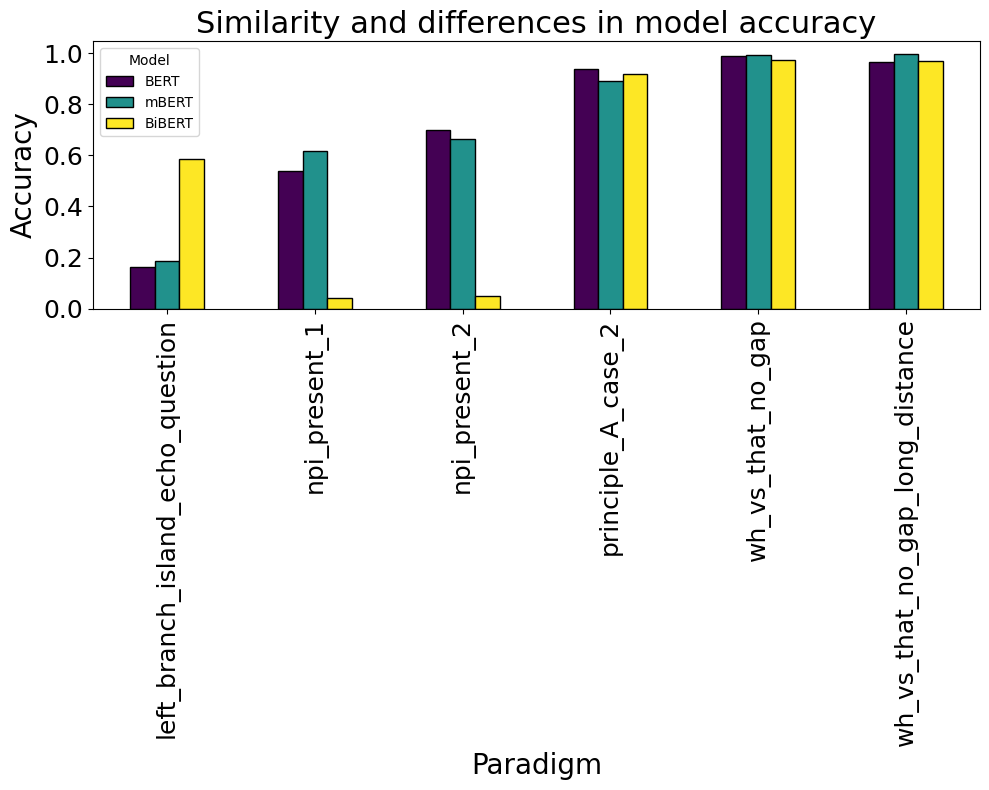

In [6]:
# Select paradigms by name
differences_df = accuracy_by_paradigm_df.loc[['npi_present_1', 'npi_present_2', 'left_branch_island_echo_question']]
similarities_df = accuracy_by_paradigm_df.loc[['wh_vs_that_no_gap_long_distance', 'wh_vs_that_no_gap', 'principle_A_case_2']]

# Merge both DataFrames
combined_df = pd.concat([differences_df, similarities_df])

# Plot the combined DataFrame as a horizontal bar plot
combined_df.sort_index().plot(kind='bar', figsize=(10, 8), colormap='viridis', edgecolor='black')

# Add labels and title
plt.ylabel('Accuracy')
plt.xlabel('Paradigm')
plt.title('Differences and Similarities in Paradigms')
plt.legend(title='Model')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Paradigm', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Similarity and differences in model accuracy', fontsize=22)

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
import ast

# Filter bert_df
# Convert string representations of lists to actual lists using ast.literal_eval
bert_df['good_fillers'] = bert_df['good_fillers'].apply(ast.literal_eval)
bert_df['bad_fillers'] = bert_df['bad_fillers'].apply(ast.literal_eval)
mbert_df['good_fillers_mbert'] = mbert_df['good_fillers_mbert'].apply(ast.literal_eval)
mbert_df['bad_fillers_mbert'] = mbert_df['bad_fillers_mbert'].apply(ast.literal_eval)
bibert_df['good_fillers_bibert'] = bibert_df['good_fillers_bibert'].apply(ast.literal_eval)
bibert_df['bad_fillers_bibert'] = bibert_df['bad_fillers_bibert'].apply(ast.literal_eval)

# Filter bert_df
filtered_bert_df = bert_df[
    (bert_df['good_fillers'].apply(len) == 1) & 
    (bert_df['bad_fillers'].apply(len) == 1)
]

# Filter mbert_df
filtered_mbert_df = mbert_df[
    (mbert_df['good_fillers_mbert'].apply(len) == 1) & 
    (mbert_df['bad_fillers_mbert'].apply(len) == 1)
]

# Filter bibert_df
filtered_bibert_df = bibert_df[
    (bibert_df['good_fillers_bibert'].apply(len) == 1) & 
    (bibert_df['bad_fillers_bibert'].apply(len) == 1)
]

# Display the filtered DataFrames
display(filtered_bert_df.sample(10))
display(filtered_mbert_df.sample(10))
display(filtered_bibert_df.sample(10))

,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon,sentence_masked,good_fillers,bad_fillers,bert_good_prob,bert_bad_prob,bert_prediction
43357,Holly explains that Chad remembers her.,Holly explains that Chad remembers herself.,syntax_semantics,binding,principle_A_domain_1,True,True,False,False,396,BINDING,Holly explains that Chad remembers [MASK].,[her],[herself],0.372749,0.000396,1
21725,Theodore's mothers predict there to be a lot o...,Theodore's mothers push there to be a lot of h...,syntax_semantics,control_raising,existential_there_object_raising,True,False,True,False,393,CTRL RAIS,Theodore's mothers [MASK] there to be a lot of...,[predict],[push],0.000069,0.000013,1
10647,A government did listen to these actresses.,A government did listen to this actresses.,morphology,determiner_noun_agreement,determiner_noun_agreement_2,True,False,True,True,651,D-N AGR,A government did listen to [MASK] actresses.,[these],[this],0.054850,0.001912,1
36287,Only Diana would ever neglect to buy this skirt.,Even Diana would ever neglect to buy this skirt.,semantics,npi_licensing,only_npi_licensor_present,True,False,True,False,317,NPI,[MASK] Diana would ever neglect to buy this sk...,[Only],[Even],0.576064,0.001305,1
48829,The teachers had not ever ascertained Roger to...,The teachers had probably ever ascertained Rog...,semantics,npi_licensing,sentential_negation_npi_licensor_present,True,False,True,False,119,NPI,The teachers had [MASK] ever ascertained Roger...,[not],[probably],0.420394,0.001491,1
47726,The organization wasn't corresponding.,The organizations wasn't corresponding.,morphology,subject_verb_agreement,regular_plural_subject_verb_agreement_2,True,False,True,False,16,S-V AGR,The [MASK] wasn't corresponding.,[organization],[organizations],0.000449,0.000001,1
9763,The students scan those documentaries.,The students scan those documentary.,morphology,determiner_noun_agreement,determiner_noun_agreement_1,True,True,False,True,767,D-N AGR,The students scan those [MASK].,[documentaries],[documentary],0.000040,0.000002,1
55635,Douglas wasn't certain to lift some cats.,Douglas wasn't exciting to lift some cats.,syntax_semantics,control_raising,tough_vs_raising_2,True,False,False,False,925,CTRL RAIS,Douglas wasn't [MASK] to lift some cats.,[certain],[exciting],0.000398,0.000008,1
61398,Maria conceals that a pepper distracted Theresa.,Maria conceals who a pepper distracted Theresa.,syntax,filler_gap_dependency,wh_vs_that_no_gap,True,False,False,False,694,FILLER. GAP,Maria conceals [MASK] a pepper distracted Ther...,[that],[who],0.015453,0.001028,1
17295,The essays about art have astounded Theresa.,The essays about art has astounded Theresa.,morphology,subject_verb_agreement,distractor_agreement_relational_noun,True,True,False,False,478,S-V AGR,The essays about art [MASK] astounded Theresa.,[have],[has],0.251121,0.021959,1


,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon,sentence_masked_mbert,good_fillers_mbert,bad_fillers_mbert,mbert_good_prob,mbert_bad_prob,mbert_prediction
47657,The bank has reunited.,The banks has reunited.,morphology,subject_verb_agreement,regular_plural_subject_verb_agreement_2,True,False,True,False,38,S-V AGR,The [MASK] has reunited.,[bank],[banks],0.000119,0.000012,1
41755,All drivers imagine that they discovered some ...,All drivers imagine that themselves discovered...,syntax_semantics,binding,principle_A_case_1,True,True,False,False,877,BINDING,All drivers imagine that [MASK] discovered som...,[they],[themselves],0.285843,0.000116,1
43895,Rodney is saying Renee hadn't fled from herself.,Rodney is saying Renee hadn't fled from himself.,syntax_semantics,binding,principle_A_domain_2,True,True,False,False,22,BINDING,Rodney is saying Renee hadn't fled from [MASK].,[herself],[himself],0.000359,0.000641,0
53857,Sherry's friend wasn't interesting to complain...,Sherry's friend wasn't soon to complain about.,syntax_semantics,control_raising,tough_vs_raising_1,True,False,False,False,241,CTRL RAIS,Sherry's friend wasn't [MASK] to complain about.,[interesting],[soon],0.000069,0.000141,0
48066,The driver hasn't stood up.,The drivers hasn't stood up.,morphology,subject_verb_agreement,regular_plural_subject_verb_agreement_2,True,False,True,False,447,S-V AGR,The [MASK] hasn't stood up.,[driver],[drivers],0.000837,0.000013,1
31029,The person practices.,The people practices.,morphology,subject_verb_agreement,irregular_plural_subject_verb_agreement_2,True,False,True,False,118,S-V AGR,The [MASK] practices.,[person],[people],0.000002,0.000039,0
34073,Even this library often embarrasses Benjamin.,Even this library ever embarrasses Benjamin.,semantics,npi_licensing,npi_present_1,True,True,False,False,162,NPI,Even this library [MASK] embarrasses Benjamin.,[often],[ever],0.002510,0.002154,1
38959,All actors were observed.,All actors were collaborated.,syntax,argument_structure,passive_2,True,False,False,False,81,ARG STR,All actors were [MASK].,[observed],[collaborated],0.000168,0.000022,1
14782,Nina wouldn't like this white foot.,Nina wouldn't like this white feet.,morphology,determiner_noun_agreement,determiner_noun_agreement_with_adj_irregular_1,True,True,False,True,799,D-N AGR,Nina wouldn't like this white [MASK].,[foot],[feet],0.000200,0.000075,1
47666,The patient isn't referencing Thomas.,The patients isn't referencing Thomas.,morphology,subject_verb_agreement,regular_plural_subject_verb_agreement_2,True,False,True,False,47,S-V AGR,The [MASK] isn't referencing Thomas.,[patient],[patients],0.000120,0.000008,1


,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon,sentence_masked_bibert,good_fillers_bibert,bad_fillers_bibert,bibert_good_prob,bibert_bad_prob,bibert_prediction
57253,What shouldn't Lissa remember she does skate a...,What shouldn't Lissa remember who does skate a...,syntax,island_effects,wh_island,True,True,False,False,587,ISLAND,What shouldn't Lissa remember [MASK] does skat...,[she],[who],0.000058,2.109662e-05,1
13998,These tomatoes astound that concealed person.,These tomatoes astound that concealed people.,morphology,determiner_noun_agreement,determiner_noun_agreement_with_adj_irregular_1,True,True,False,True,5,D-N AGR,These tomatoes astound that concealed [MASK].,[person],[people],0.000007,3.108791e-05,0
61867,Anna hasn't realized that most students that f...,Anna hasn't realized what most students that f...,syntax,filler_gap_dependency,wh_vs_that_no_gap_long_distance,True,False,False,False,201,FILLER. GAP,Anna hasn't realized [MASK] most students that...,[that],[what],0.000323,2.701261e-05,1
40045,All universities that aggravated Carmen should...,All universities that aggravated Carmen should...,syntax_semantics,binding,principle_A_c_command,True,True,False,False,105,BINDING,All universities that aggravated Carmen should...,[themselves],[herself],0.000110,2.034739e-04,0
30063,David took most convertibles.,David taken most convertibles.,morphology,irregular_forms,irregular_past_participle_verbs,True,True,False,False,748,IRREGULAR,David [MASK] most convertibles.,[took],[taken],0.000009,1.831254e-06,1
17536,The fathers of Leslie have learned.,The fathers of Leslie has learned.,morphology,subject_verb_agreement,distractor_agreement_relational_noun,True,True,False,False,864,S-V AGR,The fathers of Leslie [MASK] learned.,[have],[has],0.000008,2.283671e-06,1
3600,James wasn't revealed by some woman.,James wasn't revealed by some cars.,syntax,s-selection,animate_subject_passive,True,True,False,False,600,EMPTY,James wasn't revealed by some [MASK].,[woman],[cars],0.000056,2.111182e-07,1
11925,Ruth heals those men.,Ruth heals those man.,morphology,determiner_noun_agreement,determiner_noun_agreement_irregular_1,True,True,False,True,932,D-N AGR,Ruth heals those [MASK].,[men],[man],0.000033,3.570720e-06,1
2450,All people irritate themselves.,All people irritate himself.,morphology,anaphor_agreement,anaphor_number_agreement,True,True,False,True,450,ANA AGR,All people irritate [MASK].,[themselves],[himself],0.000357,1.353172e-04,1
40365,A guy that astounded Candice returns to himself.,A guy that astounded Candice returns to herself.,syntax_semantics,binding,principle_A_c_command,True,True,False,False,425,BINDING,A guy that astounded Candice returns to [MASK].,[himself],[herself],0.000010,1.105962e-05,0


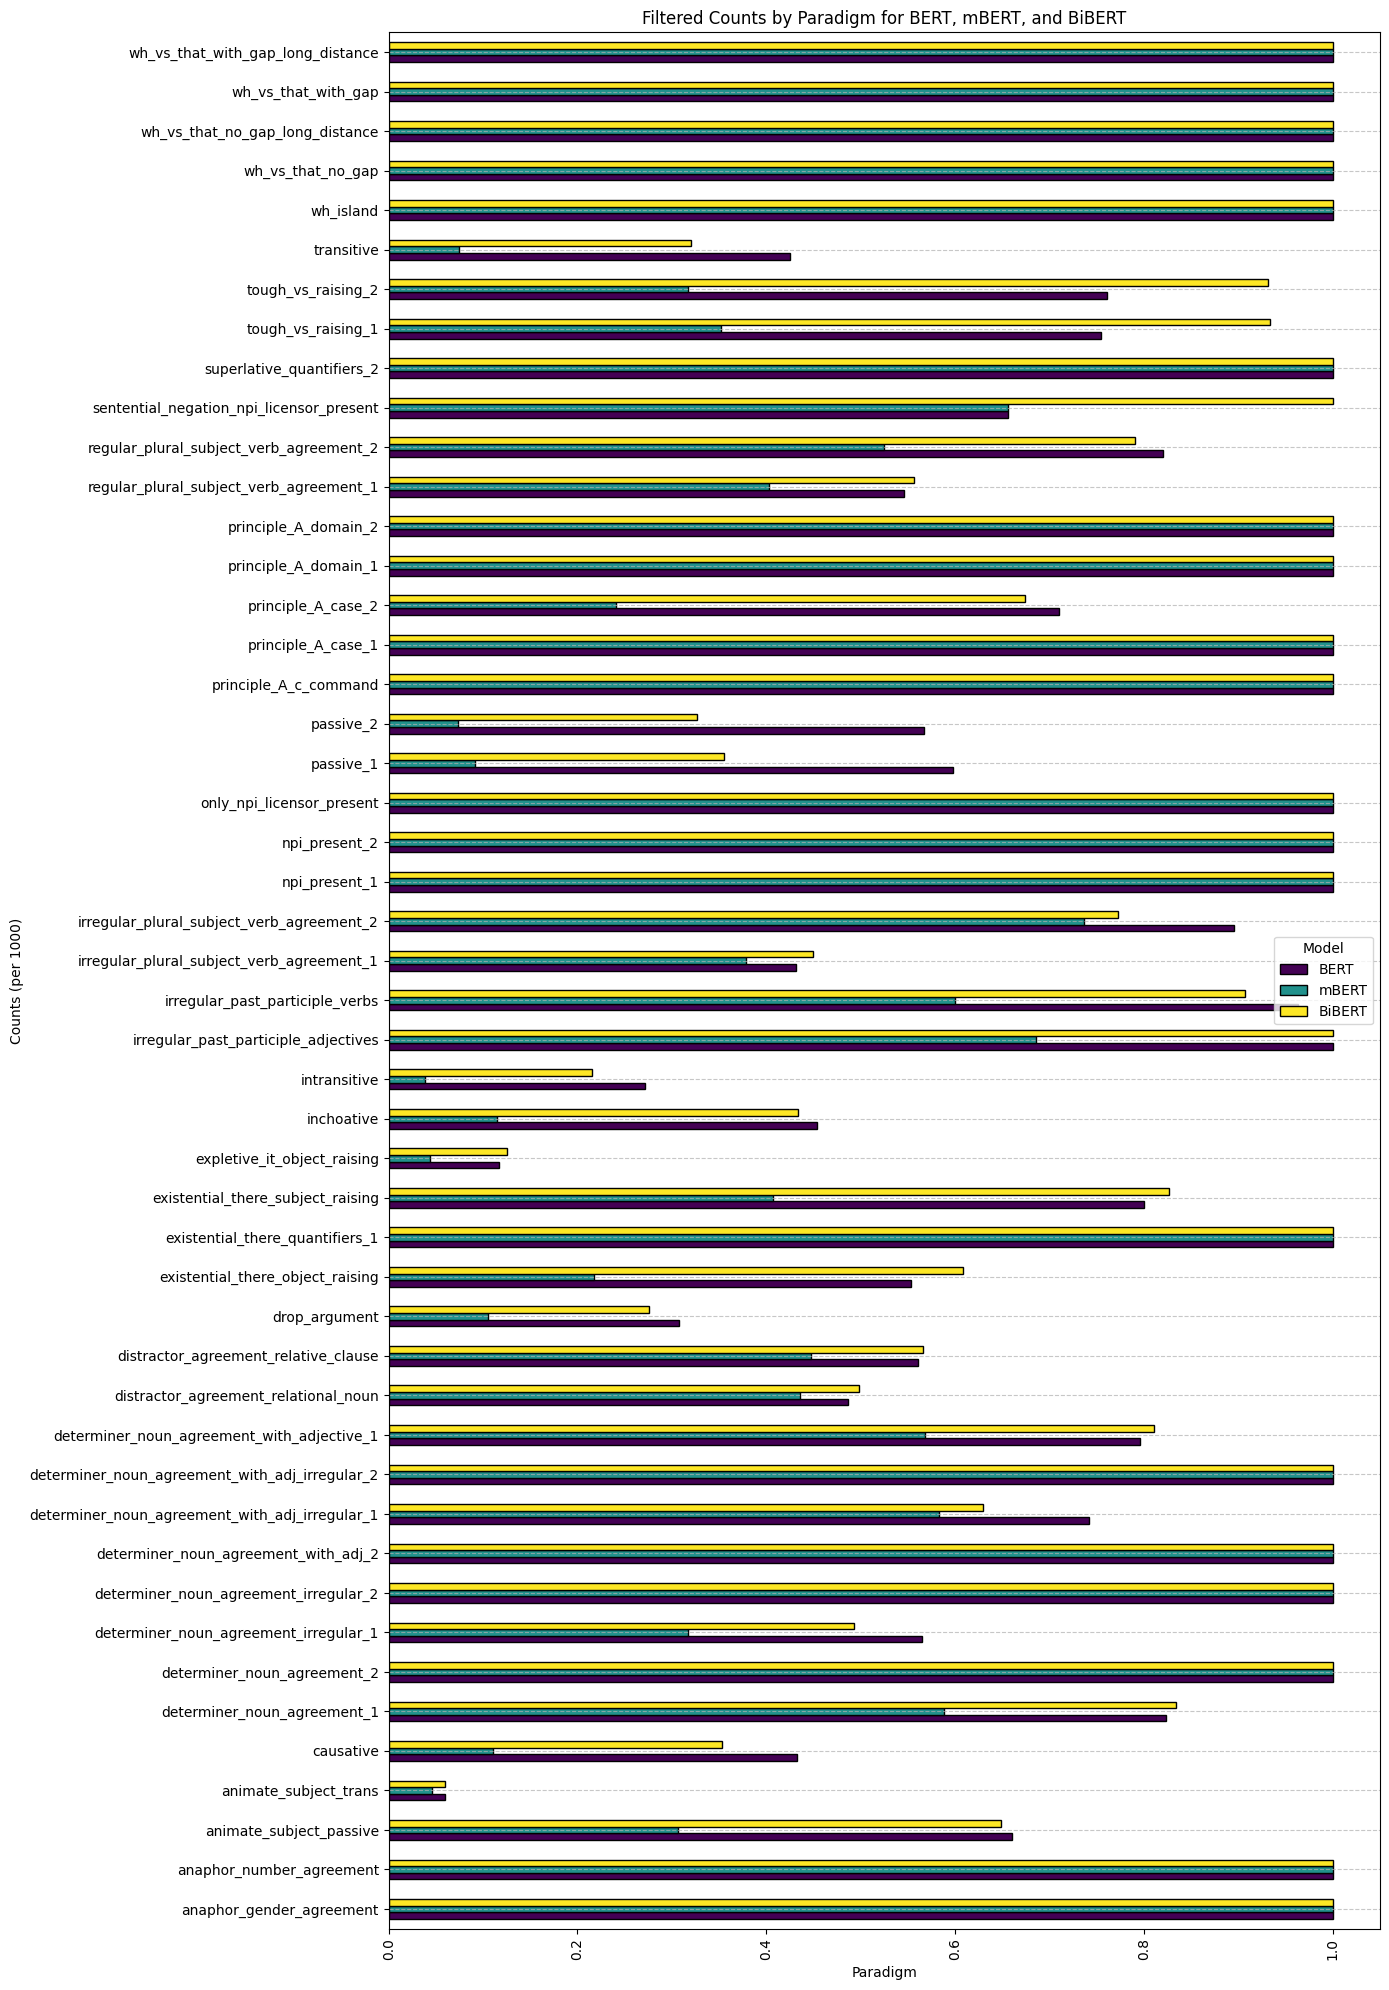

In [8]:
# Calculate the number of entries kept for each paradigm in the filtered DataFrames
filtered_bert_counts = filtered_bert_df['paradigm'].value_counts()
filtered_mbert_counts = filtered_mbert_df['paradigm'].value_counts()
filtered_bibert_counts = filtered_bibert_df['paradigm'].value_counts()

# Combine the counts into a single DataFrame for plotting
filtered_counts_df = pd.DataFrame({
    'BERT': filtered_bert_counts,
    'mBERT': filtered_mbert_counts,
    'BiBERT': filtered_bibert_counts
}).fillna(0)

# Normalize the counts to 1000 entries
filtered_counts_df = (filtered_counts_df / 1000).round(3)

# Plot the counts as a bar plot
filtered_counts_df.sort_index().plot(kind='barh', figsize=(14, 20), colormap='viridis', edgecolor='black')

# Add labels and title
plt.xlabel('Paradigm')
plt.ylabel('Counts (per 1000)')
plt.title('Filtered Counts by Paradigm for BERT, mBERT, and BiBERT')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Filter `filtered_counts_df` to only keep paradigms where the count of all models is at least 800
filtered_counts_df = filtered_counts_df[
    (filtered_counts_df['BERT'] >= 0.8) &
    (filtered_counts_df['mBERT'] >= 0.8) &
    (filtered_counts_df['BiBERT'] >= 0.8)
]

# Display the filtered DataFrame
display(filtered_counts_df)

,BERT,mBERT,BiBERT
paradigm,,,
anaphor_gender_agreement,1.0,1.0,1.0
anaphor_number_agreement,1.0,1.0,1.0
determiner_noun_agreement_2,1.0,1.0,1.0
determiner_noun_agreement_irregular_2,1.0,1.0,1.0
determiner_noun_agreement_with_adj_2,1.0,1.0,1.0
determiner_noun_agreement_with_adj_irregular_2,1.0,1.0,1.0
existential_there_quantifiers_1,1.0,1.0,1.0
npi_present_1,1.0,1.0,1.0
npi_present_2,1.0,1.0,1.0


In [10]:
# Calculate accuracy for each model on the filtered DataFrames
filtered_bert_accuracy = filtered_bert_df['bert_prediction'].mean()
filtered_mbert_accuracy = filtered_mbert_df['mbert_prediction'].mean()
filtered_bibert_accuracy = filtered_bibert_df['bibert_prediction'].mean()

# Display the accuracies
print(f"Filtered BERT Accuracy: {filtered_bert_accuracy:.4f}")
print(f"Filtered mBERT Accuracy: {filtered_mbert_accuracy:.4f}")
print(f"Filtered BiBERT Accuracy: {filtered_bibert_accuracy:.4f}")

Filtered BERT Accuracy: 0.8668
Filtered mBERT Accuracy: 0.7847
Filtered BiBERT Accuracy: 0.5857


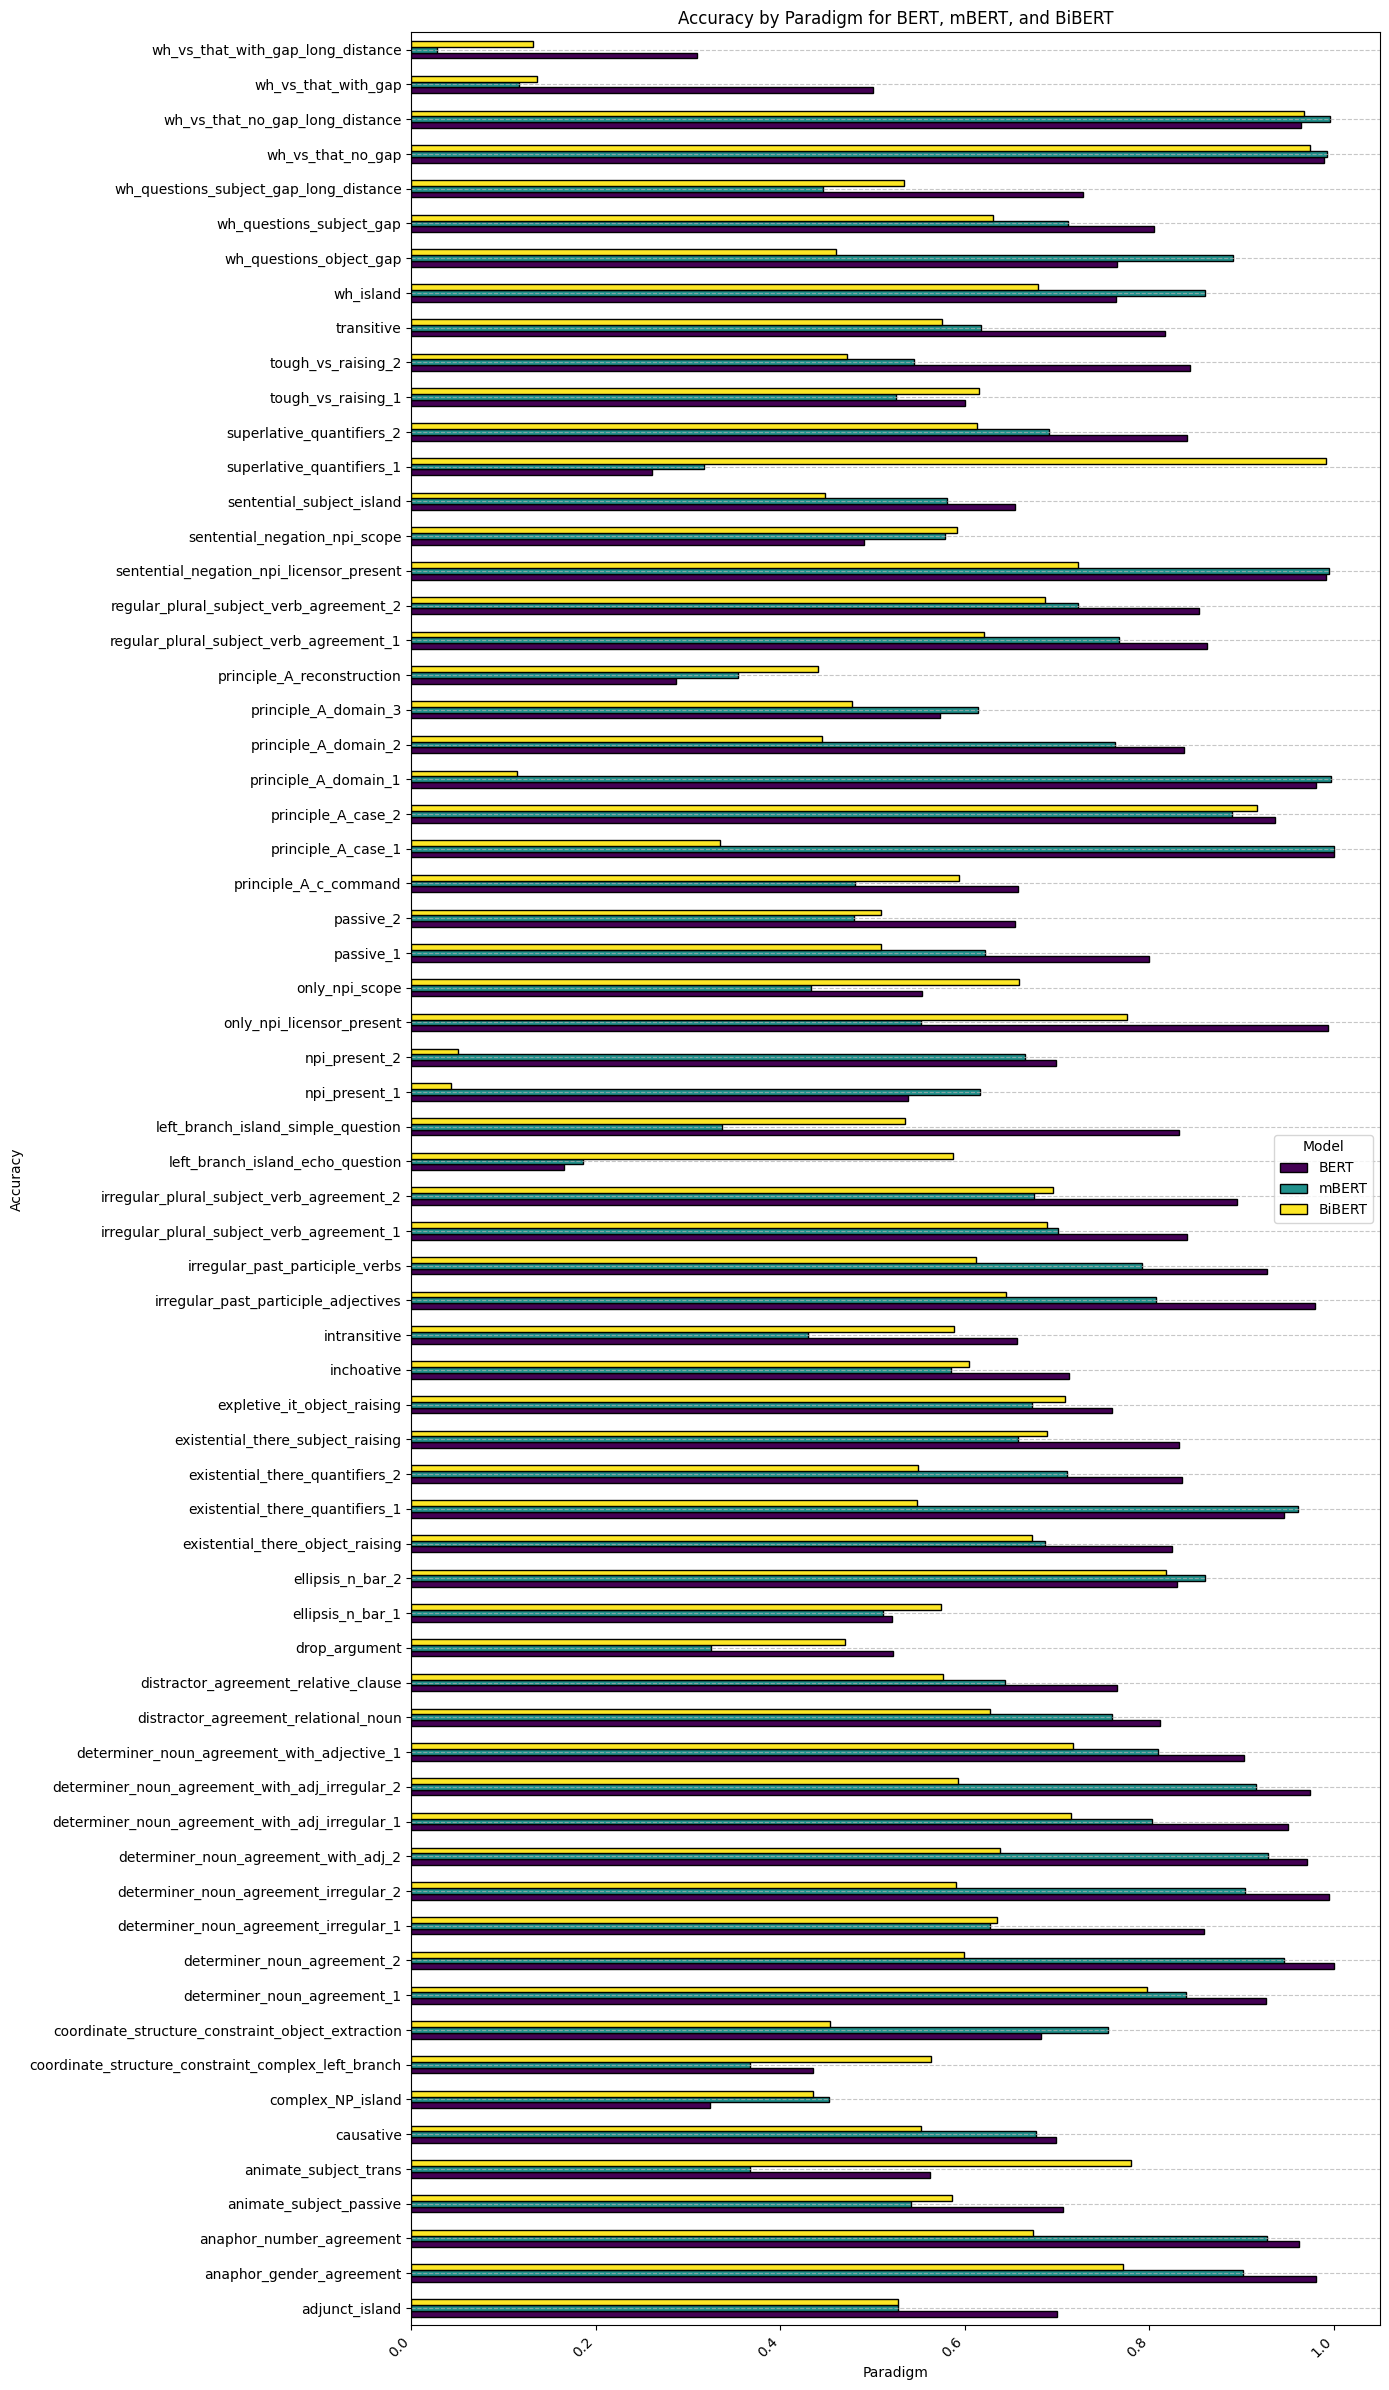

In [11]:
# Calculate accuracy per paradigm for all three models
bert_accuracy_by_paradigm = bert_df.groupby("paradigm")["bert_prediction"].mean()
mbert_accuracy_by_paradigm = mbert_df.groupby("paradigm")["mbert_prediction"].mean()
bibert_accuracy_by_paradigm = bibert_df.groupby("paradigm")["bibert_prediction"].mean()

# Combine the accuracies into a single DataFrame for plotting
filtered_by_paradigm_df = pd.DataFrame({
    'BERT': bert_accuracy_by_paradigm,
    'mBERT': mbert_accuracy_by_paradigm,
    'BiBERT': bibert_accuracy_by_paradigm
})

# Plot the accuracies
accuracy_by_paradigm_df.sort_index().plot(kind='barh', figsize=(14, 24), colormap='viridis', edgecolor='black')

# Add labels and title
plt.xlabel('Paradigm')
plt.ylabel('Accuracy')
plt.title('Accuracy by Paradigm for BERT, mBERT, and BiBERT')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

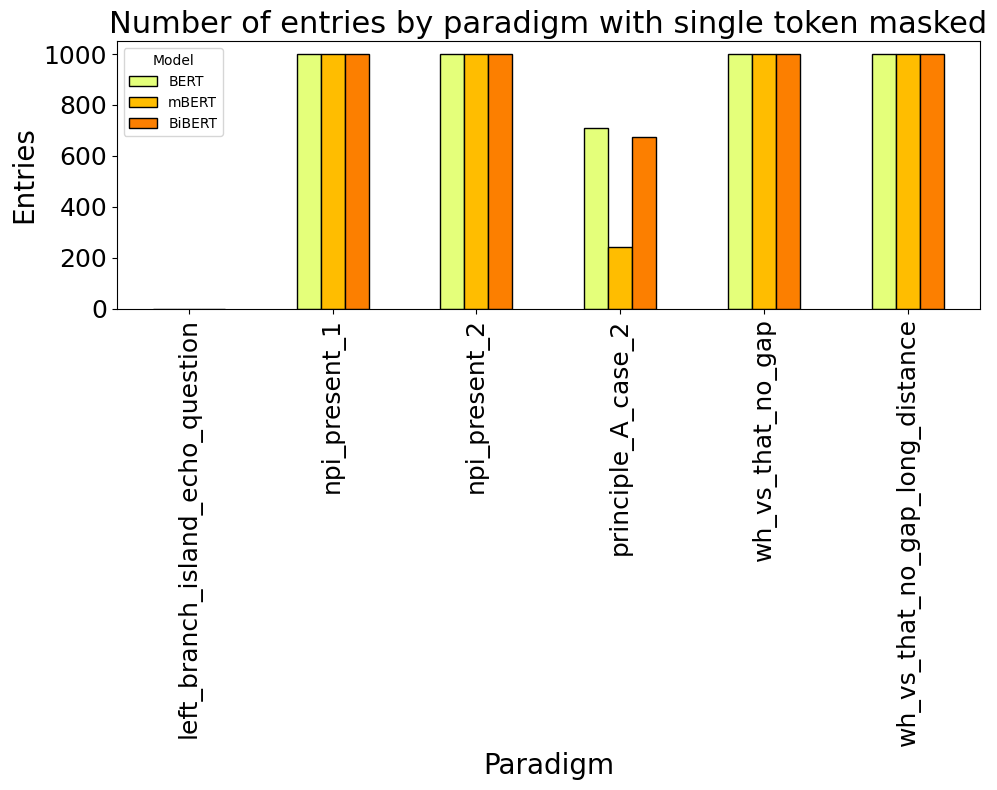

In [12]:
# merge filtered
filtered_merge_df = pd.DataFrame({
    'BERT': filtered_bert_counts,
    'mBERT': filtered_mbert_counts,
    'BiBERT': filtered_bibert_counts
}).fillna(0)

# Select paradigms by name
filtered_differences_df = filtered_merge_df.loc[['npi_present_1', 'npi_present_2']]
filtered_similarities_df = filtered_merge_df.loc[['wh_vs_that_no_gap_long_distance', 'wh_vs_that_no_gap', 'principle_A_case_2']]

# Merge both DataFrames
filtered_combined_df = pd.concat([
    filtered_differences_df, 
    filtered_similarities_df, 
    pd.DataFrame({'BERT': [0], 'mBERT': [0], 'BiBERT': [0]}, index=['left_branch_island_echo_question'])
])

# Plot the combined DataFrame as a horizontal bar plot
filtered_combined_df.sort_index().plot(kind='bar', figsize=(10, 8), colormap='Wistia', edgecolor='black')

# Add labels and title
plt.ylabel('Entries')
plt.xlabel('Paradigm')
plt.title('Number of entries by paradigm with single token masked')
plt.legend(title='Model')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Paradigm', fontsize=20)
plt.ylabel('Entries', fontsize=20)
plt.title('Number of entries by paradigm with single token masked', fontsize=22)

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
# Calculate overall accuracy for the filtered DataFrames
f_bert = bert_df[bert_df['paradigm'].isin(filtered_counts_df.index)]
f_mbert = mbert_df[mbert_df['paradigm'].isin(filtered_counts_df.index)]
f_bibert = bibert_df[bibert_df['paradigm'].isin(filtered_counts_df.index)]

# Calculate the overall accuracy for the filtered DataFrames
filtered_bert_accuracy = f_bert['bert_prediction'].mean()
filtered_mbert_accuracy = f_mbert['mbert_prediction'].mean()
filtered_bibert_accuracy = f_bibert['bibert_prediction'].mean()

# Display the overall accuracies
print(f"Filtered BERT Overall Accuracy: {filtered_bert_accuracy:.4f}")
print(f"Filtered mBERT Overall Accuracy: {filtered_mbert_accuracy:.4f}")
print(f"Filtered BiBERT Overall Accuracy: {filtered_bibert_accuracy:.4f}")

display(f_bert.sample(10))

Filtered BERT Overall Accuracy: 0.8452
Filtered mBERT Overall Accuracy: 0.7622
Filtered BiBERT Overall Accuracy: 0.5136


,sentence_good,sentence_bad,field,linguistics_term,paradigm,simple_LM_method,one_prefix_method,two_prefix_method,lexically_identical,pair_id,phenomenon,sentence_masked,good_fillers,bad_fillers,bert_good_prob,bert_bad_prob,bert_prediction
63757,Those drivers learn what some patients that ha...,Those drivers learn that some patients that ha...,syntax,filler_gap_dependency,wh_vs_that_with_gap_long_distance,True,False,False,False,53,FILLER. GAP,Those drivers learn [MASK] some patients that ...,[what],[that],0.149532,0.230741,0
57144,What had all women revealed they have ascended?,What had all women revealed what have ascended?,syntax,island_effects,wh_island,True,True,False,False,440,ISLAND,What had all women revealed [MASK] have ascended?,[they],[what],0.000611,0.000013,1
62218,Derek had learned that some ladies that ran ar...,Derek had learned who some ladies that ran aro...,syntax,filler_gap_dependency,wh_vs_that_no_gap_long_distance,True,False,False,False,514,FILLER. GAP,Derek had learned [MASK] some ladies that ran ...,[that],[who],0.963603,0.000016,1
1313,Kayla thinks about herself.,Kayla thinks about itself.,morphology,anaphor_agreement,anaphor_gender_agreement,True,True,False,False,313,ANA AGR,Kayla thinks about [MASK].,[herself],[itself],0.000957,0.000025,1
10717,Martha respects those hospitals.,Martha respects that hospitals.,morphology,determiner_noun_agreement,determiner_noun_agreement_2,True,False,True,True,721,D-N AGR,Martha respects [MASK] hospitals.,[those],[that],0.004686,0.000234,1
41286,The woman said that she irritated Tammy.,The woman said that herself irritated Tammy.,syntax_semantics,binding,principle_A_case_1,True,True,False,False,320,BINDING,The woman said that [MASK] irritated Tammy.,[she],[herself],0.011075,0.000942,1
57323,What could a lot of senators figure out they h...,What could a lot of senators figure out who ha...,syntax,island_effects,wh_island,True,True,False,False,619,ISLAND,What could a lot of senators figure out [MASK]...,[they],[who],0.515447,0.001731,1
34194,Even Tamara can certainly look like the sketches.,Even Tamara can ever look like the sketches.,semantics,npi_licensing,npi_present_1,True,True,False,False,224,NPI,Even Tamara can [MASK] look like the sketches.,[certainly],[ever],0.002217,0.000314,1
56833,What hadn't Rachel revealed she would discover?,What hadn't Rachel revealed who would discover?,syntax,island_effects,wh_island,True,True,False,False,129,ISLAND,What hadn't Rachel revealed [MASK] would disco...,[she],[who],0.780685,0.003021,1
61874,A lot of adults realize that those children th...,A lot of adults realize what those children th...,syntax,filler_gap_dependency,wh_vs_that_no_gap_long_distance,True,False,False,False,170,FILLER. GAP,A lot of adults realize [MASK] those children ...,[that],[what],0.933558,0.006640,1


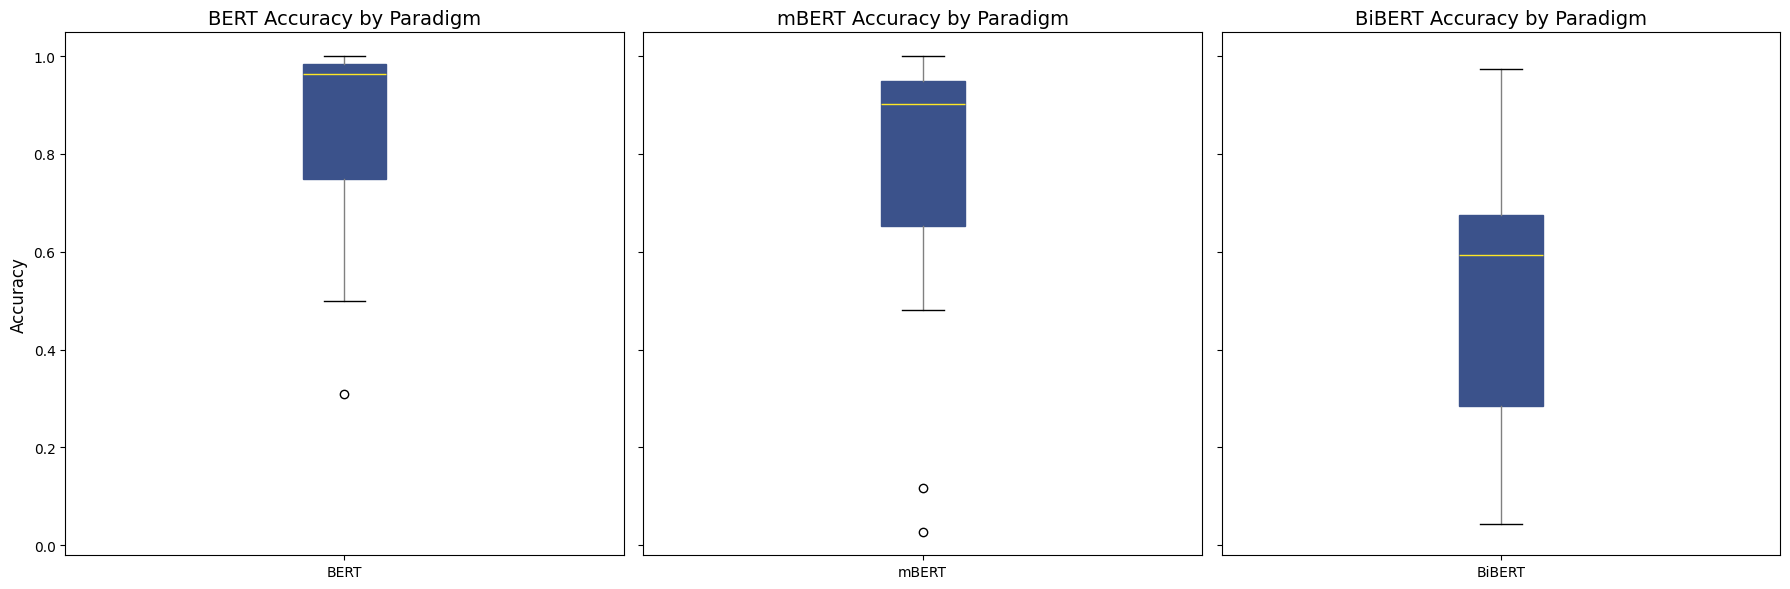

In [14]:
# Calculate accuracy grouped by paradigm for each model
bert_accuracy_by_paradigm = f_bert.groupby("paradigm")["bert_prediction"].mean()
mbert_accuracy_by_paradigm = f_mbert.groupby("paradigm")["mbert_prediction"].mean()
bibert_accuracy_by_paradigm = f_bibert.groupby("paradigm")["bibert_prediction"].mean()

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    'BERT': bert_accuracy_by_paradigm,
    'mBERT': mbert_accuracy_by_paradigm,
    'BiBERT': bibert_accuracy_by_paradigm
})

# Plot boxplots for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

accuracy_df['BERT'].plot(kind='box', ax=axes[0], color={'boxes': '#3b528b', 'whiskers': 'gray', 'medians': '#fde725', 'caps': 'black'}, patch_artist=True)
axes[0].set_title('BERT Accuracy by Paradigm', fontsize=14)
axes[0].set_ylabel('Accuracy', fontsize=12)

accuracy_df['mBERT'].plot(kind='box', ax=axes[1], color={'boxes': '#3b528b', 'whiskers': 'gray', 'medians': '#fde725', 'caps': 'black'}, patch_artist=True)
axes[1].set_title('mBERT Accuracy by Paradigm', fontsize=14)

accuracy_df['BiBERT'].plot(kind='box', ax=axes[2], color={'boxes': '#3b528b', 'whiskers': 'gray', 'medians': '#fde725', 'caps': 'black'}, patch_artist=True)
axes[2].set_title('BiBERT Accuracy by Paradigm', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [45]:
# Calculate Q1, Q3, and IQR for each model
q1 = accuracy_df.quantile(0.25)
q3 = accuracy_df.quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers for each model
outliers = {}
for model in accuracy_df.columns:
    outliers[model] = accuracy_df[
        (accuracy_df[model] < lower_bound[model]) | 
        (accuracy_df[model] > upper_bound[model])
    ].index.tolist()

# Display the outliers
for model, paradigms in outliers.items():
    print(f"Outliers for {model}: {paradigms}")

Outliers for BERT: ['wh_vs_that_with_gap_long_distance']
Outliers for mBERT: ['wh_vs_that_with_gap', 'wh_vs_that_with_gap_long_distance']
Outliers for BiBERT: []


In [16]:
# Sort the DataFrame by each model's accuracy
sorted_df = accuracy_df.sort_values(by=['BERT', 'mBERT', 'BiBERT'], ascending=True)

# Select the two worst and two best performing paradigms for each model
worst_best_df = pd.concat([sorted_df.head(2), sorted_df.tail(2)])

# Display the result
display(worst_best_df)

,BERT,mBERT,BiBERT
paradigm,,,
wh_vs_that_with_gap_long_distance,0.31,0.028,0.132
wh_vs_that_with_gap,0.50,0.117,0.136
determiner_noun_agreement_2,1.00,0.946,0.599
principle_A_case_1,1.00,1.000,0.334


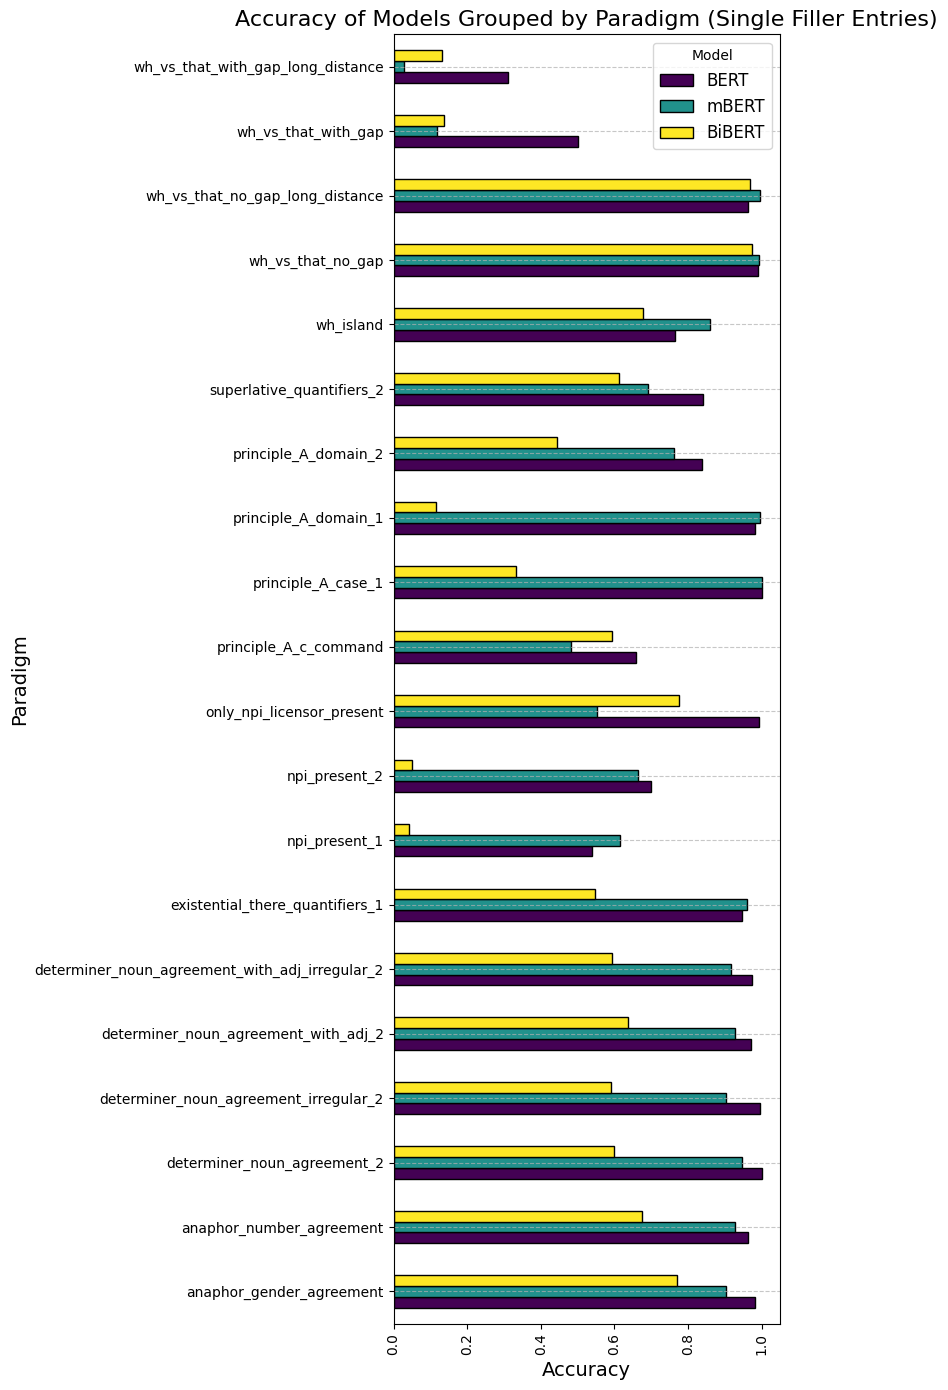

In [47]:
# Filter for single filler entries
single_filler_bert = f_bert[(f_bert['good_fillers'].apply(len) == 1) & (f_bert['bad_fillers'].apply(len) == 1)]
single_filler_mbert = f_mbert[(f_mbert['good_fillers_mbert'].apply(len) == 1) & (f_mbert['bad_fillers_mbert'].apply(len) == 1)]
single_filler_bibert = f_bibert[(f_bibert['good_fillers_bibert'].apply(len) == 1) & (f_bibert['bad_fillers_bibert'].apply(len) == 1)]

# Calculate accuracy grouped by paradigm
single_filler_bert_accuracy = single_filler_bert.groupby("paradigm")["bert_prediction"].mean()
single_filler_mbert_accuracy = single_filler_mbert.groupby("paradigm")["mbert_prediction"].mean()
single_filler_bibert_accuracy = single_filler_bibert.groupby("paradigm")["bibert_prediction"].mean()

# Combine the accuracies into a single DataFrame for plotting
single_filler_accuracy_df = pd.DataFrame({
    'BERT': single_filler_bert_accuracy,
    'mBERT': single_filler_mbert_accuracy,
    'BiBERT': single_filler_bibert_accuracy
})

# Plot the accuracies
single_filler_accuracy_df.sort_index().plot(kind='barh', figsize=(8, 14), colormap='viridis', edgecolor='black')

# Add labels and title
plt.ylabel('Paradigm', fontsize=14)
plt.xlabel('Accuracy', fontsize=14)
plt.title('Accuracy of Models Grouped by Paradigm (Single Filler Entries)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

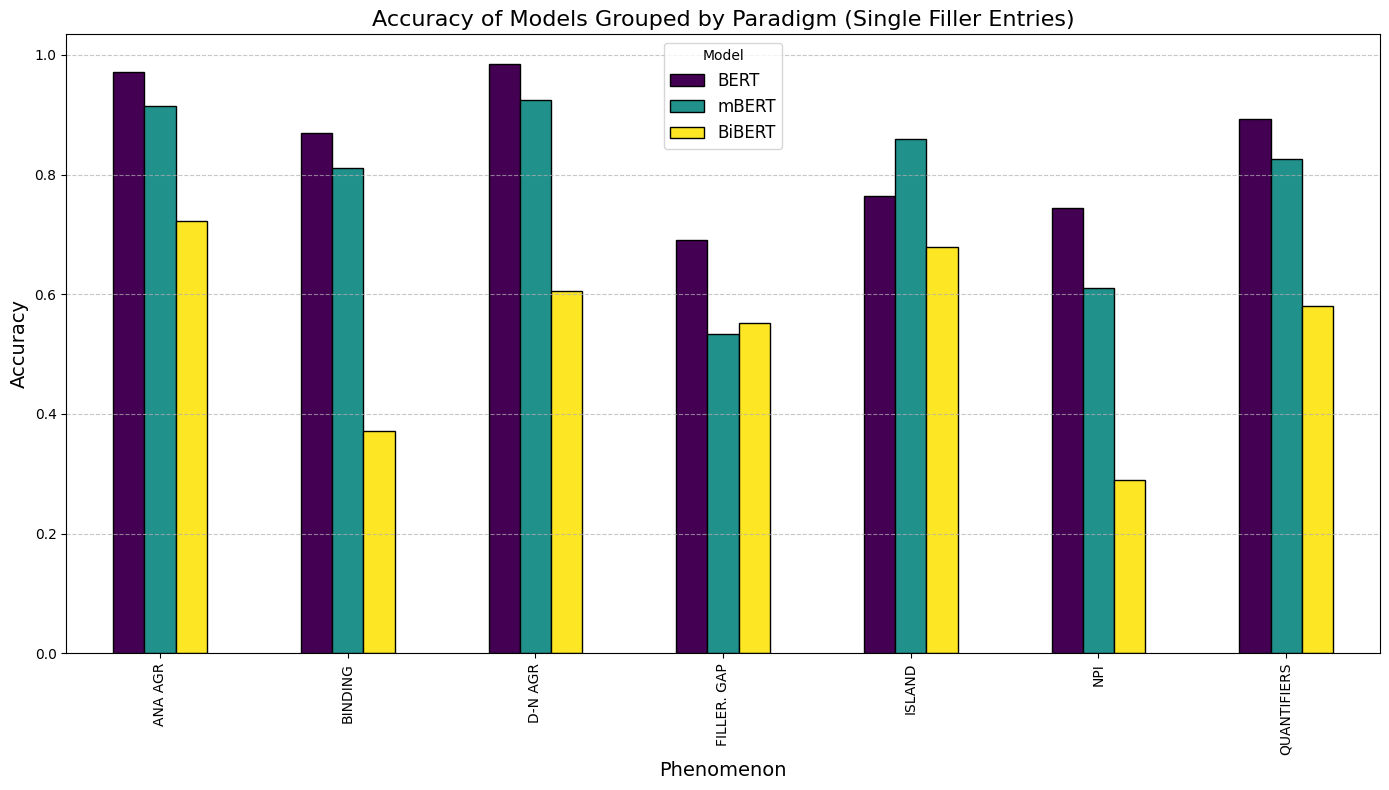

In [18]:
# Filter for single filler entries
single_filler_bert = f_bert[(f_bert['good_fillers'].apply(len) == 1) & (f_bert['bad_fillers'].apply(len) == 1)]
single_filler_mbert = f_mbert[(f_mbert['good_fillers_mbert'].apply(len) == 1) & (f_mbert['bad_fillers_mbert'].apply(len) == 1)]
single_filler_bibert = f_bibert[(f_bibert['good_fillers_bibert'].apply(len) == 1) & (f_bibert['bad_fillers_bibert'].apply(len) == 1)]

# Calculate accuracy grouped by paradigm
single_filler_bert_accuracy = single_filler_bert.groupby("phenomenon")["bert_prediction"].mean()
single_filler_mbert_accuracy = single_filler_mbert.groupby("phenomenon")["mbert_prediction"].mean()
single_filler_bibert_accuracy = single_filler_bibert.groupby("phenomenon")["bibert_prediction"].mean()

# Combine the accuracies into a single DataFrame for plotting
single_filler_accuracy_df = pd.DataFrame({
    'BERT': single_filler_bert_accuracy,
    'mBERT': single_filler_mbert_accuracy,
    'BiBERT': single_filler_bibert_accuracy
})

# Plot the accuracies
single_filler_accuracy_df.sort_index().plot(kind='bar', figsize=(14, 8), colormap='viridis', edgecolor='black')

# Add labels and title
plt.xlabel('Phenomenon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Models Grouped by Paradigm (Single Filler Entries)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

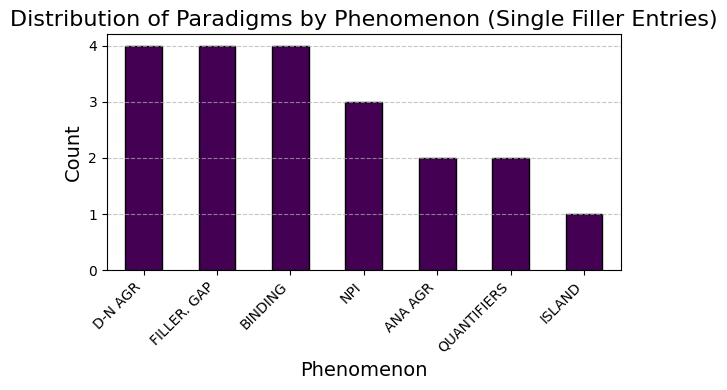

In [41]:
# Filter for single filler entries
single_filler_bert = f_bert[(f_bert['good_fillers'].apply(len) == 1) & (f_bert['bad_fillers'].apply(len) == 1)]
single_filler_mbert = f_mbert[(f_mbert['good_fillers_mbert'].apply(len) == 1) & (f_mbert['bad_fillers_mbert'].apply(len) == 1)]
single_filler_bibert = f_bibert[(f_bibert['good_fillers_bibert'].apply(len) == 1) & (f_bibert['bad_fillers_bibert'].apply(len) == 1)]


# Combine the filtered DataFrames
combined_single_filler_df = pd.concat([
    single_filler_bert[['pair_id', 'paradigm', 'phenomenon']],
    single_filler_mbert[['pair_id', 'paradigm', 'phenomenon']],
    single_filler_bibert[['pair_id', 'paradigm', 'phenomenon']]
], ignore_index=True)

# Count the occurrences of each phenomenon
phenomenon_counts = (combined_single_filler_df['phenomenon'].value_counts() / 3000)

# Plot the distribution
phenomenon_counts.plot(kind='bar', figsize=(6, 4), colormap='viridis', edgecolor='black')

# Add labels and title
plt.xlabel('Phenomenon', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Paradigms by Phenomenon (Single Filler Entries)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

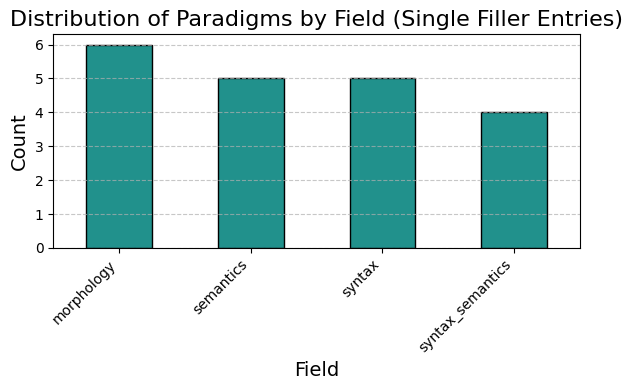

In [44]:
# Filter for single filler entries
single_filler_bert = f_bert[(f_bert['good_fillers'].apply(len) == 1) & (f_bert['bad_fillers'].apply(len) == 1)]
single_filler_mbert = f_mbert[(f_mbert['good_fillers_mbert'].apply(len) == 1) & (f_mbert['bad_fillers_mbert'].apply(len) == 1)]
single_filler_bibert = f_bibert[(f_bibert['good_fillers_bibert'].apply(len) == 1) & (f_bibert['bad_fillers_bibert'].apply(len) == 1)]


# Combine the filtered DataFrames
combined_single_filler_df = pd.concat([
    single_filler_bert[['pair_id', 'paradigm', 'field']],
    single_filler_mbert[['pair_id', 'paradigm', 'field']],
    single_filler_bibert[['pair_id', 'paradigm', 'field']]
], ignore_index=True)

# Count the occurrences of each phenomenon
phenomenon_counts = (combined_single_filler_df['field'].value_counts() / 3000)

# Plot the distribution
phenomenon_counts.plot(kind='bar', figsize=(6, 4), color='#21918c', edgecolor='black')

# Add labels and title
plt.xlabel('Field', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Paradigms by Field (Single Filler Entries)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()